# Two-way Sparse Logistic Singular Value Decomposition: User Guide

## Setup

In [9]:
import slsvd2

print(slsvd2.__version__)

0.1.0


In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
from slsvd2.data2 import *

In [12]:
from slsvd2.slsvd2 import *

In [13]:
bin_mat, loadings, scores, diagonal=generate_data_2_way(n=200, d=100, rank=2, random_seed=123)

In [14]:
bin_mat.shape

(200, 100)

In [15]:
np.count_nonzero(loadings,axis=0)

array([20, 20])

In [16]:
np.count_nonzero(scores,axis=0)

array([20, 20])

In [17]:
loadings.T @ loadings

array([[1., 0.],
       [0., 1.]])

In [18]:
scores.T @ scores

array([[1., 0.],
       [0., 1.]])

In [19]:
diagonal

array([[100,   0],
       [  0,  50]])

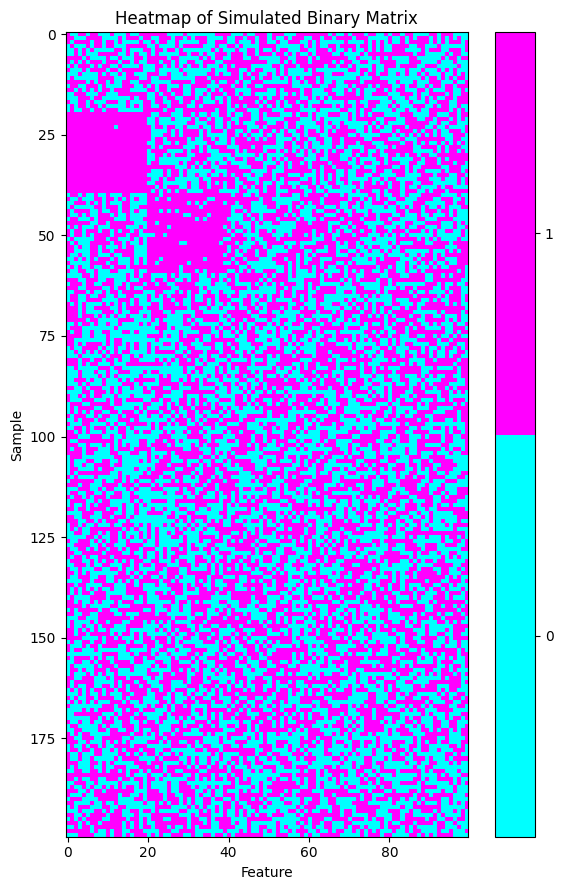

In [20]:
plt.figure(figsize=(6, 9))  # Adjust the width and height as needed

# Create a custom colormap using cyan and magenta
colors = ['cyan', 'magenta']
cmap = plt.matplotlib.colors.ListedColormap(colors, name='custom_cmap', N=2)

plt.imshow(bin_mat, cmap=cmap, interpolation='nearest')

cbar = plt.colorbar(ticks=[0.25, 0.75])
cbar.ax.set_yticklabels(['0', '1'])

plt.title('Heatmap of Simulated Binary Matrix')
plt.xlabel('Feature')
plt.ylabel('Sample')

# Use tight layout to reduce white space
plt.tight_layout()

# Show the plot
plt.show()


In [21]:
mu0, A0, B0,S0,zeros0, BICs0=sparse_logistic_svd_coord_2_way(dat=bin_mat, lambdas=np.array([0]),etas=np.array([0]),k=2) 

In [22]:
mu0

0.07933574417007386

In [23]:
A0.shape

(200, 2)

In [24]:
S0

array([[54.71211288,  0.        ],
       [ 0.        , 50.67857296]])

In [25]:
thelam=np.logspace(-2, 0.7, num=5)

In [26]:
theeta=np.logspace(-2, 0.7, num=5)

In [27]:
mu, A, B,S, zeros, BICs=sparse_logistic_svd_coord_2_way(dat=bin_mat, lambdas=thelam, etas=theeta, k=2) 

In [28]:
mu

0.07933574417007386

In [29]:
A.shape

(200, 2)

In [30]:
A.T @ A

array([[1.        , 0.02601576],
       [0.02601576, 1.        ]])

In [31]:
B.T @ B

array([[1.        , 0.03334437],
       [0.03334437, 1.        ]])

In [32]:
np.count_nonzero(A,axis=0)

array([23, 23])

In [33]:
np.count_nonzero(B,axis=0)

array([21, 14])

In [34]:
S

array([[16.30303605,  0.        ],
       [ 0.        , 11.50328828]])

In [35]:
BICs

array([[29445.97634893, 29760.24508855],
       [29405.92212765, 29758.95932715],
       [29325.86613546, 29619.23657349],
       [28877.99756874, 29173.48882736],
       [27986.21755067, 28275.76767929],
       [29445.63827744, 29738.74341566],
       [29396.35016701, 29728.80074177],
       [29296.63609052, 29579.81415518],
       [28858.90920586, 29154.33354876],
       [27966.23301783, 28275.90632806],
       [29369.72044882, 29711.85661782],
       [29359.92593077, 29652.41963623],
       [29250.45674799, 29543.16081213],
       [28823.85129965, 29128.31759295],
       [27937.13965123, 28229.9016787 ],
       [29236.2880702 , 29517.58980199],
       [29246.39950368, 29468.55905391],
       [29107.46506407, 29380.25486936],
       [28666.30790403, 28898.01392712],
       [27720.66509572, 27948.58092169],
       [28959.6498346 , 29219.40848972],
       [28955.78255456, 29180.18890711],
       [28847.28838592, 29085.05130973],
       [28393.66602999, 28581.71767051],
       [27433.96

In [36]:
range(BICs.shape[0])

range(0, 25)

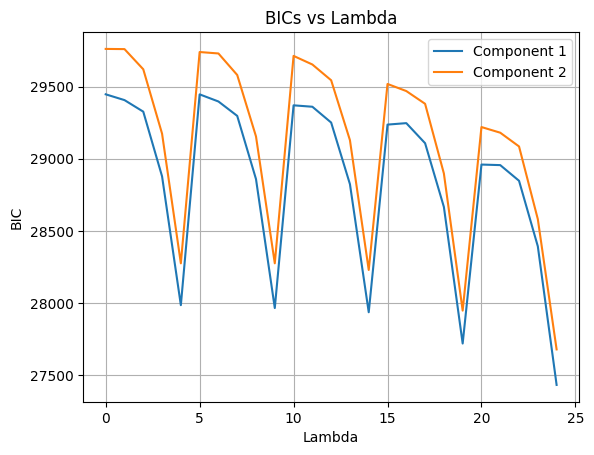

In [37]:
for i in range(BICs.shape[1]):
    plt.plot(range(BICs.shape[0]), BICs[:, i], label=f'Component {i+1}')

plt.xlabel('Lambda')
plt.ylabel('BIC')
plt.title('BICs vs Lambda')
#plt.xscale('log')  # Log scale for better visualization
plt.legend()
plt.grid(True)
plt.show()

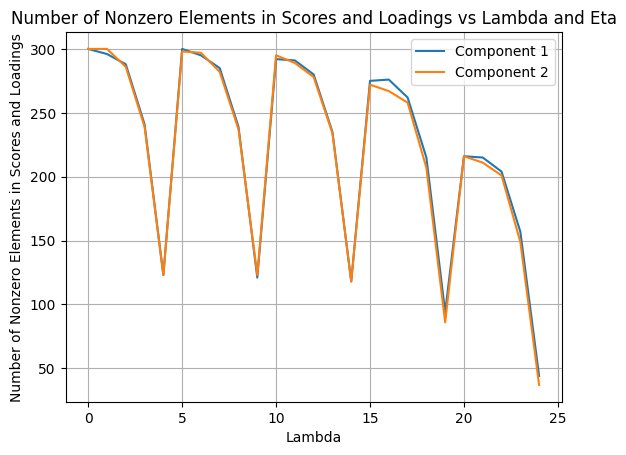

In [38]:
for i in range(zeros.shape[1]):
    plt.plot(range(zeros.shape[0]), zeros[:, i],label=f'Component {i+1}')

plt.xlabel('Lambda')
plt.ylabel('Number of Nonzero Elements in Scores and Loadings')
plt.title('Number of Nonzero Elements in Scores and Loadings vs Lambda and Eta')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
res= A @ S @ B.T

In [40]:
res.shape

(200, 100)

In [41]:
np.max(res),np.min(res)

(1.0700858754946383, -1.2249930692398827)

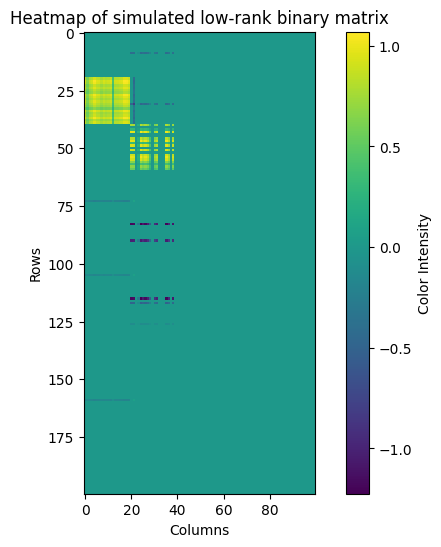

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.imshow(res, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Color Intensity')
plt.title('Heatmap of simulated low-rank binary matrix')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()


In [43]:
truth= scores @ diagonal @ loadings.T

In [44]:
truth.shape

(200, 100)

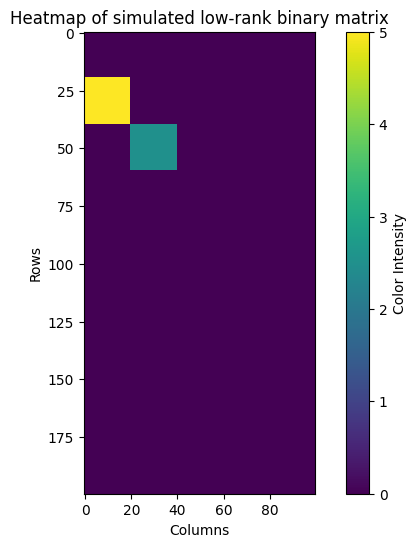

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.imshow(truth, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Color Intensity')
plt.title('Heatmap of simulated low-rank binary matrix')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()


In [46]:
from metrics import *

ModuleNotFoundError: No module named 'metrics'

In [ ]:
true_positive_rate(B, loadings), false_positive_rate(B, loadings)

(0.95, 0.0125)

In [ ]:
true_positive_rate(B0, loadings), false_positive_rate(B0, loadings)

(1.0, 1.0)

In [ ]:
true_positive_rate(A, scores), false_positive_rate(A, scores)

(0.95, 0.019444444444444445)

In [ ]:
true_positive_rate(A0, scores), false_positive_rate(A0, scores)

(1.0, 1.0)

In [ ]:
principle_angle(B, loadings),principle_angle(B0, loadings)

(26.06103718632072, 41.40550410222966)

In [ ]:
principle_angle(A, scores),principle_angle(A0, scores)

(26.211280491692378, 49.97653429866916)

In [ ]:
mse(B,loadings),mse(B0,loadings)

(0.60073341273732, 1.3711034184084476)

In [ ]:
mse(A,scores),mse(A0,scores)

(0.6062899052614977, 1.947866384661322)

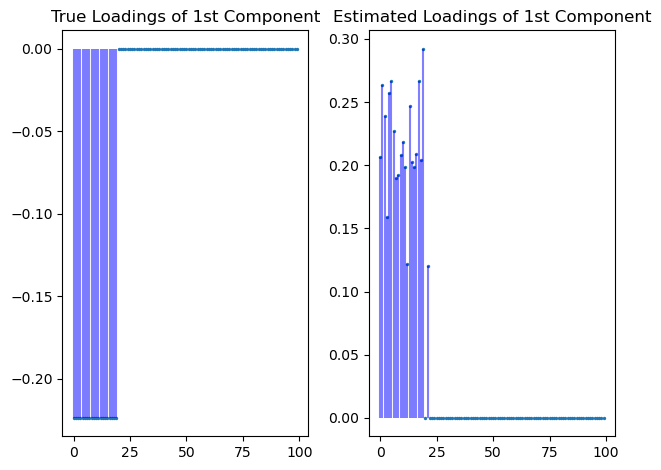

In [ ]:
plt.subplot(1, 2, 1)
plt.scatter(range(len(loadings[:, 0])), loadings[:, 0], s=2)
for i, val in enumerate(loadings[:, 0]):
    plt.vlines(i, 0, val, color='blue', linestyle='-', alpha=0.5)
plt.title('True Loadings of 1st Component')

plt.subplot(1, 2, 2)
plt.scatter(range(len(loadings[:, 0])), B[:, 0], s=2)
for i, val in enumerate(B[:, 0]):
    plt.vlines(i, 0, val, color='blue', linestyle='-', alpha=0.5)
plt.title('Estimated Loadings of 1st Component')

plt.tight_layout()
plt.show()

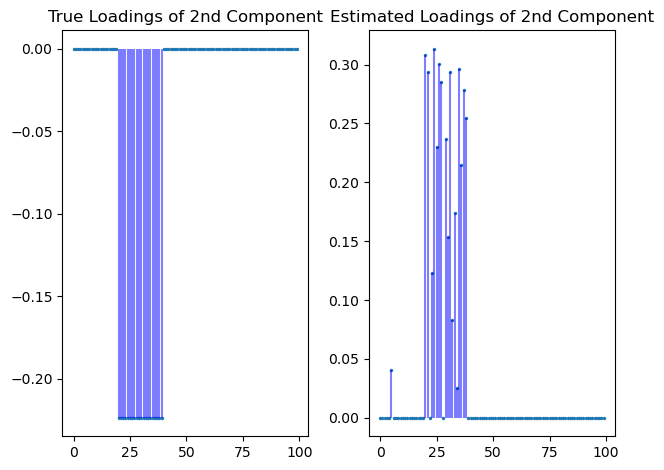

In [ ]:
plt.subplot(1, 2, 1)
plt.scatter(range(len(loadings[:, 1])), loadings[:, 1], s=2)
for i, val in enumerate(loadings[:, 1]):
    plt.vlines(i, 0, val, color='blue', linestyle='-', alpha=0.5)
plt.title('True Loadings of 2nd Component')

plt.subplot(1, 2, 2)
plt.scatter(range(len(loadings[:, 1])), B[:, 1], s=2)
for i, val in enumerate(B[:, 1]):
    plt.vlines(i, 0, val, color='blue', linestyle='-', alpha=0.5)
plt.title('Estimated Loadings of 2nd Component')

plt.tight_layout()
plt.show()

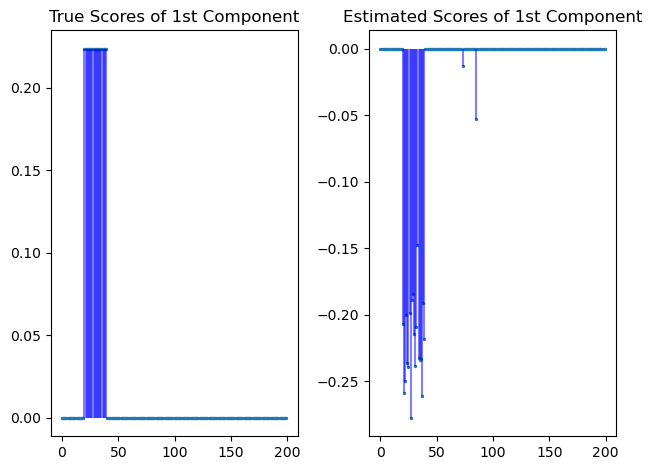

In [ ]:
plt.subplot(1, 2, 1)
plt.scatter(range(len(scores[:, 0])), scores[:, 0], s=2)
for i, val in enumerate(scores[:, 0]):
    plt.vlines(i, 0, val, color='blue', linestyle='-', alpha=0.5)
plt.title('True Scores of 1st Component')

plt.subplot(1, 2, 2)
plt.scatter(range(len(scores[:, 0])), A[:, 0], s=2)
for i, val in enumerate(A[:, 0]):
    plt.vlines(i, 0, val, color='blue', linestyle='-', alpha=0.5)
plt.title('Estimated Scores of 1st Component')

plt.tight_layout()
plt.show()

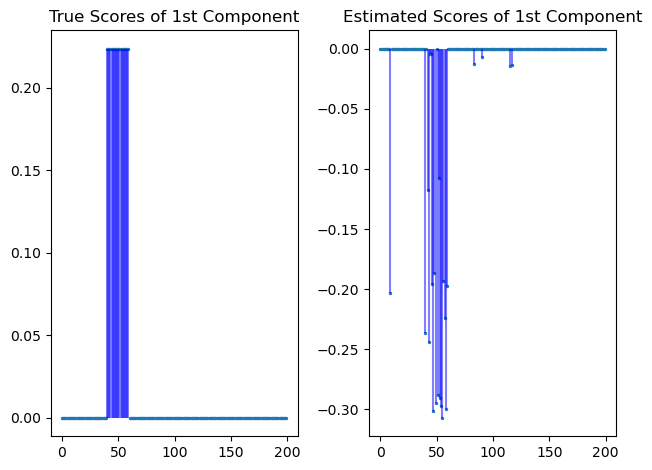

In [ ]:
plt.subplot(1, 2, 1)
plt.scatter(range(len(scores[:, 1])), scores[:, 1], s=2)
for i, val in enumerate(scores[:, 1]):
    plt.vlines(i, 0, val, color='blue', linestyle='-', alpha=0.5)
plt.title('True Scores of 1st Component')

plt.subplot(1, 2, 2)
plt.scatter(range(len(scores[:, 1])), A[:, 1], s=2)
for i, val in enumerate(A[:, 1]):
    plt.vlines(i, 0, val, color='blue', linestyle='-', alpha=0.5)
plt.title('Estimated Scores of 1st Component')

plt.tight_layout()
plt.show()

## Reference
- Lee, S., & Huang, J. Z. (2014). A biclustering algorithm for binary matrices based on penalized Bernoulli likelihood. Statistics and Computing, 24, 429-441.